In [ ]:
import tensorflow as tf
tf.version


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.6/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
tf.__version__

'2.2.0-rc3'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/ComputerVision


[Errno 2] No such file or directory: '/content/drive/ComputerVision'
/content


In [ ]:
cd /content/drive/My Drive/ComputerVision

/content/drive/My Drive/ComputerVision


In [ ]:
pwd


'/content/drive/My Drive/ComputerVision'

In [ ]:
%ls

test.p  traffic-signs-data.zip  train.p  Untitled0.ipynb  valid.p


In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=b0b0c231a1fc91e2bb10cbc6a66bacbd38d0993a9cac86c52d437a47e7a36382
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
link="https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
wget.download(link)

NameError: ignored

In [ ]:
data="./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

In [ ]:
train_link=data+"train.p"
valid_link=data+"valid.p"
test_link=data+"test.p"

In [ ]:
import pickle


In [ ]:
with open(train_link,mode="rb") as f:
  train=pickle.load(f)
  

In [ ]:
with open(valid_link,mode="rb") as f:
  valid=pickle.load(f)
  

In [ ]:
with open(test_link,mode="rb") as f:
  test=pickle.load(f)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
trainX=train["features"]
trainy=train["labels"]

In [ ]:
validX=valid["features"]
validy=valid["labels"]

In [ ]:
testX=test["features"]
testy=test["labels"]

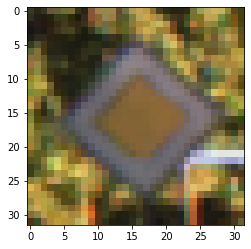

In [ ]:
plt.imshow(trainX[0])


In [ ]:
trainX.shape[0]

34799

In [ ]:
from sklearn.utils import shuffle



In [ ]:
trainX,trainy=shuffle(trainX,trainy)

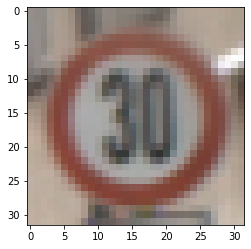

In [ ]:
plt.imshow(trainX[0])

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


Keep right


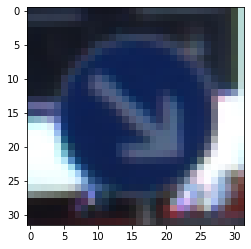

In [ ]:
plt.imshow(trainX[1])
print(classNames[trainy[1]])

In [ ]:
# print all shape
print("Shape of X_train",trainX.shape)
print("Shape of y_train",trainy.shape)
print("Shape of X_val",validX.shape)
print("Shape of y_val",validy.shape)
print("Shape of X_test",testX.shape)
print("Shape of y_test",testy.shape)

Shape of X_train (34799, 32, 32, 3)
Shape of y_train (34799,)
Shape of X_val (4410, 32, 32, 3)
Shape of y_val (4410,)
Shape of X_test (12630, 32, 32, 3)
Shape of y_test (12630,)


In [ ]:
# Normalize
X_train=trainX/255.
X_val=validX/255.
X_test=testX/255.

In [ ]:
import numpy as np


In [ ]:
#convert number to one hot coding
y_train=trainy
y_test=testy
y_val=validy
Y_train=np.zeros((X_train.shape[0],43))
Y_val=np.zeros((X_val.shape[0],43))
Y_test=np.zeros((X_test.shape[0],43))

In [ ]:
list_idx=range(X_train.shape[0])
Y_train[list_idx,y_train]=1


In [ ]:
list_idx=range(X_val.shape[0])
Y_val[list_idx,y_val]=1


In [ ]:
list_idx=range(X_test.shape[0])
Y_test[list_idx,y_test]=1

In [ ]:
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

34799
4410
12630


In [ ]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Input,Flatten
from keras.layers import Conv2D,MaxPool2D,BatchNormalization,Activation
from keras import optimizers


In [ ]:
width=32
height=32
classes=3
shape=(width,height,classes)
inputs=Input(shape=shape)


In [ ]:

X=Conv2D(32,(3,3),padding="same")(inputs)
X=Activation("relu")(X)
X=BatchNormalization()(X)


X=Conv2D(32,(3,3),padding="same",activation="relu")(X)
X=BatchNormalization()(X)
X=MaxPool2D(pool_size=(2,2))(X)

X=Conv2D(64,(3,3),padding="same",activation="relu")(X)
X=BatchNormalization()(X)

X=Conv2D(64,(3,3),padding="same",activation="relu")(X)
X=BatchNormalization()(X)
X=MaxPool2D(pool_size=(2,2))(X)
X=Flatten()(X)
X=Activation("relu")(X)

X=Dense(units=512,activation="relu")(X)
X=Dense(units=43,activation="softmax")(X)
outputs=X



In [ ]:
model=Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_66 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_67 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 16, 16, 32)        0  

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
aug=ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)


In [ ]:
lr=0.01


In [ ]:
epochs=10
batch_size=64


In [ ]:
opt=optimizers.SGD(learning_rate=lr,momentum=0.9,nesterov=True)
model.compile(optimizer=opt,loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])


In [ ]:
print("Start train")
H=model.fit_generator(aug.flow(X_train,Y_train,batch_size=batch_size),validation_data=(X_val,Y_val),steps_per_epoch=X_train.shape[0]//batch_size,epochs=epochs,verbose=1)


Start train
Epoch 1/10
543/543 [==============================] - 28s 51ms/step - loss: 1.8561 - accuracy: 0.4316 - val_loss: 1.6003 - val_accuracy: 0.5238
Epoch 2/10
543/543 [==============================] - 21s 38ms/step - loss: 0.8405 - accuracy: 0.7140 - val_loss: 1.3181 - val_accuracy: 0.6154
Epoch 3/10
543/543 [==============================] - 21s 39ms/step - loss: 0.4241 - accuracy: 0.8549 - val_loss: 0.9762 - val_accuracy: 0.7556
Epoch 4/10
543/543 [==============================] - 21s 38ms/step - loss: 0.2547 - accuracy: 0.9144 - val_loss: 0.7158 - val_accuracy: 0.8154
Epoch 5/10
543/543 [==============================] - 21s 38ms/step - loss: 0.1735 - accuracy: 0.9415 - val_loss: 0.6782 - val_accuracy: 0.8200
Epoch 6/10
543/543 [==============================] - 21s 38ms/step - loss: 0.1309 - accuracy: 0.9557 - val_loss: 0.5997 - val_accuracy: 0.8587
Epoch 7/10
543/543 [==============================] - 21s 39ms/step - loss: 0.1003 - accuracy: 0.9663 - val_loss: 0.5708 - v

In [ ]:
scores=model.evaluate(X_test,Y_test)


12630/12630 [==============================] - 2s 169us/step


In [ ]:
print("Accuracy:",scores[1])

Accuracy: 0.8851147890090942


In [ ]:
model.save("vanhanh.h5")

In [ ]:
result=model.predict(X_test[1:2])

In [ ]:
print(result)

[[2.14887579e-15 9.99995112e-01 1.39136732e-11 1.97335371e-18
  1.92497357e-18 4.90120419e-06 1.40392302e-15 4.51172792e-19
  1.07544900e-21 3.36175375e-29 6.87931884e-29 1.14549435e-23
  3.15907392e-30 2.65857896e-26 3.17144213e-20 2.95001609e-19
  2.07882193e-18 3.65499324e-33 1.03458434e-14 2.27543278e-28
  1.78068076e-28 1.03905764e-29 3.17927352e-31 1.01213355e-31
  2.84704437e-25 1.80503211e-16 1.41931362e-29 6.70551560e-22
  1.15697355e-16 1.98382589e-22 4.37346828e-26 6.31923268e-27
  8.39248859e-23 7.73291654e-21 3.39379801e-22 6.86785889e-22
  8.48304350e-20 1.10145974e-23 2.22542584e-23 2.08269881e-22
  2.13880702e-24 1.37432866e-30 3.02423573e-29]]


In [ ]:
print(np.argmax(result))

1


In [ ]:
classNames[1]

'Speed limit (30km/h)'

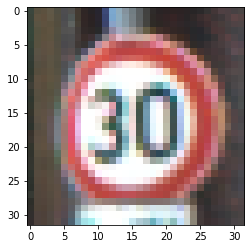

In [ ]:
plt.imshow(test["features"][1])

In [ ]:
acc=H.history["accuracy"]
acc_val=H.history["val_accuracy"]
loss=H.history["loss"]
loss_val=H.history["val_loss"]

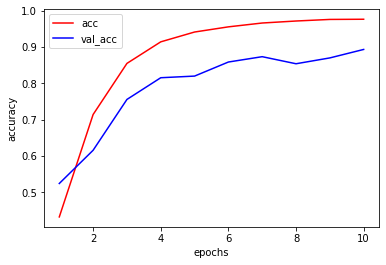

In [ ]:
list_idx=np.arange(len(acc))+1
plt.plot(list_idx,acc,'r',label="acc")
plt.plot(list_idx,acc_val,'b',label="val_acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

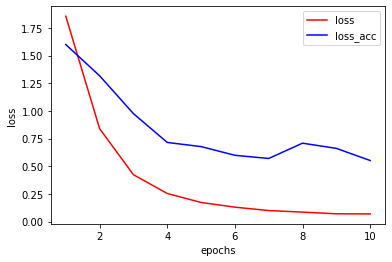

In [ ]:
list_idx=np.arange(len(acc))+1
plt.plot(list_idx,loss,'r',label="loss")
plt.plot(list_idx,loss_val,'b',label="loss_acc")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()